# Experimenting with tracking in Bifacial Radiance

This journal supports the process of designing a solar panel configuration to appropriately represent ideal shading conditions for coffee production underneath elevated solar panels. 

The coffee trees would be under and/or in between elevated solar panels (panels would be elevated 6, 8, or 10 ft tall). The light/shade analysis helps determine appropriate panel heights and spacings t0 achieve appropriate shading.  The desired level of shading is maximum of 30% (i.e., 70% of normal, unshaded light). 

Details:
*  The coffee plants are expected to be \~5 ft tall. (5-6 ft tall and 3 ft wide (<a href="https://realgoodcoffeeco.com/blogs/realgoodblog/how-to-grow-a-coffee-plant-at-home#:~:text=However%2C%20you%20must%20keep%20in,tall%20and%203%20feet%20wide">Reference</a>)
*	Location: 18.202142, -66.759187; (18°12'07.7"N 66°45'33.1"W)
*	Desired area of initial analysis: 400-600 ft2 (37-55 m2)
*	Racking: Fixed-tilt panels
*	Panel size: 3.3 feet x 5.4 feet                                    (1m x 1.64m)
*	Analysis variations:
<ul> <li> a.	Panel height: would like to examine heights of 6 ft, 8 ft, and 10 ft hub height. 
<li> b.	Panel spacing (N/W): would like to look at multiple distances (e.g., 2 ft, 3 ft, 4 ft) </li> 
<li> c.	Inter-Row spacing (E/W): would like to look at multiple distances (e.g., 2 ft, 3 ft, 4 ft)! </li> 


Steps on this Journal:
<ol>
    <li> <a href='#step1'> <u><b>Loop to Raytrace and sample irradiance at where Three would be located </u></b></li>
    <li> <a href='#step2'> Calculate GHI for Comparisons </li>
        <ul><li> <a href='#step2a'> Option 1: Raytrace of Empty Field  </li></ul>
        <ul><li> <a href='#step2b'> Option 2: Weather File </li></ul>
    <li> <a href='#step3'> Compile Results </li>
    <li> <a href='#step4'> Plot Results</li>
    <li> <a href='#step5'> <u><b> Raytrace with Tree Geometry <u></b></li>
        <ul><li> <a href='#step5a'>Tree Parameters</li></ul>
        <ul><li> <a href='#step5b'>Loop to Raytrace and Sample Irradiance at Each side of the Tree (N, S, E, W)</li></ul>
        <ul><li> <a href='#step5c'>Single simulation until MakeOct for Getting a PRETTY IMAGE </li></ul>
    <li> <a href='#step6'> Compile Results</li>
    <li> <a href='#step7'>  Plot </li>

</ol>
        

        
 
While we have HPC scripts to do the below simulation, this journals runs all of the above so it might take some time, as there are 109 combinations of parameters explored

In [2]:
import bifacial_radiance
import os
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bifacialvf

In [3]:
testfolder = str(Path().resolve().parent.parent / 'bifacial_radiance' / 'TEMP' /  'Experiment_2')
if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
resultsfolder = os.path.join(testfolder, 'results')

### General Parameters and Variables

In [91]:
ft2m = 0.3048
lat = 32.25
lon = -110.9  #Lat and Long for Tuscon Arizona           

# Constants
azimuth = 180                 
albedo = 0.2  # Changed from 0.31 for test 6/9/22
x = 1
y = 2 
xgap =  0.02
ygap = 0 # Meters
# D (meters)is a variable that represents the spacing between rows, not-considering the collector areas.
D = 2.8    
    
nMods = 20
nRows = 7
numpanels = 1
moduletype = 'test-module' #Need to make sure this is right module
hpc = False
sim_general_name = 'Rad_Experiment2'
CW = x * numpanels
    
#Arrays for loops  What should we Loop
hub_heights = np.array([1,1.5,2,2.5]) # height/ collector width 1
GCRs = [0.28,0.33,0.4,0.6]
clearance_heights = np.array([0.5,0.75,1,2]) 

#Defaults
hub_height_def = hub_heights[1]
GCR_def = GCRs[1]
pitch_def = CW/GCR_def
clearance_height_def = clearance_heights[2]




#width = nMods * x +(nMods-1)*(xgap)+2
#xinc = width / 14
#xstart = -width/2
#length = (4*y+(3*ygap))* np.cos(np.radians(tilt))*2+D+2
#ystart = length/1.328
#yinc = -length/9

print(pitch_def)

3.0303030303030303


In [85]:
starttime =pd.to_datetime('2021-06-01 01:00:0')
endtime = pd.to_datetime('2021-06-30 23:00:0')
demo = bifacial_radiance.RadianceObj(sim_general_name,str(testfolder)) 
demo.setGround(albedo)
epwfile = demo.getEPW(lat,lon)  
metdata = demo.readWeatherFile(epwfile, starttime=starttime, endtime=endtime, coerce_year = 2021) # Name and path
#metdata=demo.readWeatherFile(epwfile, starttime=starttime, endtime=endtime)
limit_angle = 60 # tracker rotation limit angle. Setting it ridiculously small so this runs faster.
angledelta = 10 # sampling between the limit angles. 
backtrack = True
gcr = GCR_def
cumulativesky = True # This is important 
trackerdict = demo.set1axis(metdata = metdata, limit_angle = limit_angle, angledelta = angledelta, backtrack = backtrack, 
                            gcr = gcr, cumulativesky = cumulativesky)
trackerdict = demo.genCumSky1axis()

#demo.genCumSky()
#else:
   #epwfile = r'EPWs\USA_WA_Ephrata.Muni.AP.727826_TMY3.epw' 
    #Not nespelem but close. How should I use the Nespelem weather file

path = C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2
Loading albedo, 1 value(s), 0.310 avg
1 nonzero albedo values.
Getting weather file: USA_AZ_Davis-Monthan.AFB.722745_TMY3.epw
 ... OK!
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
Saving file EPWs\1axis_-60.0.csv, # points: 30
Saving file EPWs\1axis_-50.0.csv, # points: 30
Saving file EPWs\1axis_-40.0.csv, # points: 30
Saving file EPWs\1axis_-30.0.csv, # points: 60
Saving file EPWs\1axis_-10.0.csv, # points: 60
Saving file EPWs\1axis_0.0.csv, # points: 30
Saving file EPWs\1axis_10.0.csv, # points: 11
Saving file EPWs\1axis_20.0.csv, # points: 27
Saving file EPWs\1axis_30.0.csv, # p

 ## View Geometry with gendaylit

In [84]:
starttime =pd.to_datetime('2021-06-01 01:00:0')
endtime = pd.to_datetime('2021-06-30 23:00:0')
demo = bifacial_radiance.RadianceObj(sim_general_name,str(testfolder)) 
demo.setGround(albedo)
epwfile = demo.getEPW(lat,lon)  
metdata=demo.readWeatherFile(epwfile, starttime=starttime, endtime=endtime, coerce_year = 2021)
timestamp = metdata.datetime.index(pd.to_datetime('2021-06-01 13:00:0 -8'))
demo.gendaylit(timestamp)  # Use this to simulate only one hour at a time.
azimuth_test = 180
pitch = pitch_def
sim_name = sim_general_name+'_az_'+str(round(azimuth,1))
module = demo.makeModule(name=moduletype, x=x, y=y,numpanels = numpanels, xgap=xgap, ygap=ygap)
sceneDict = {'tilt':20,'pitch':pitch,'hub_height':hub_height_def,'azimuth':azimuth_test,'nMods': nMods,'nRows': nRows}
scene = demo.makeScene1axis(trackerdict=trackerdict,cumulativesky=False,moduletype=moduletype,sceneDict=sceneDict)
octfile = demo.makeOct(demo.getfilelist()) 
!rvu -vf views\front.vp -e .01 -pe 0.4 -vp 3.5 -20 22 1axis_2021-06-01_1100.oct

path = C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2
Loading albedo, 1 value(s), 0.310 avg
1 nonzero albedo values.
Getting weather file: USA_AZ_Davis-Monthan.AFB.722745_TMY3.epw
 ... OK!
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos

Module Name: test-module
Module test-module updated in module.json
Pre-existing .rad file objects\test-module.rad will be overwritten


Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/
Created Rad_Experiment2.oct


## Setup length, width and sensors for scene

In [86]:
# Parameters for scene size and sensor starts
sensorsx_fb = [1,1]
sensorsy_fb = [4,6*numpanels]
#sensorsx_gb = [217,1] #217 for 10cm increase, originally 15
sensorsx_gb = [1,1] 
sensorsy_gb = [50,50]
#width = nMods * x +(nMods-1)*(xgap)+2
#xinc = width / (sensorsx_gb[0] -1) 
#xstart = -width/2
#ystart = -length/4

print(sensorsx_gb)

[1, 1]


##  Part 1: Varying Hub Height

In [89]:
module = demo.makeModule(name=moduletype, x=x, y=y, xgap=xgap, ygap=ygap)
for hh in range (0, len(hub_heights)):
    #Build scene and run raytracing for all 3 azimuths
    hub_height = hub_heights[hh]
    customname = 'HubHeight_'+ str(hub_height)
    yinc = pitch_def/(sensorsy_gb[0]-1)
    writefiletitle = os.path.join(testfolder, 'Results_Test_HubHeight_'+str(hub_height)+'.csv')
    sim_name = sim_general_name+'_HubHeight_'+str(hub_height)
    modscanfront = {'zstart': 0.05, 'zinc': 0,'orient': '0 0 -1', 'xinc':0,'yinc':yinc} #Switch xinc and yinc xstart:0
    sceneDict = {'tilt':0,'pitch': pitch_def,'hub_height':hub_height, 'nMods': 20, 'nRows': 7}  
    #sceneDict = {'tilt':tilt_def,'pitch':pitch_def,'clearance_height':clearance_height,'azimuth':azimuth,'nMods': nMods,'nRows': nRows}
    #if hub_height_def == 2: #chaackerdict = trackerdict, module = module, sceneDictnge for hub_heightdef
   
    scene = demo.makeScene1axis(trackerdict = trackerdict, module = module, sceneDict = sceneDict, cumulativesky=cumulativesky) 
    octfile = demo.makeOct1axis(trackerdict = scene) 
    #modWanted = 9
    #rowWanted = 2
        #customname = '_Row_2_Module_09' # This is useful if we want to do various analysis.
    trackerdict = demo.analysis1axis(trackerdict, modscanfront=modscanfront,customname=customname, sensorsx=sensorsx_gb,sensorsy=sensorsy_gb)
        #analysis = bifacial_radiance.AnalysisObj(octfile=octfile, name=sim_name)
        #frontscan, backscan = analysis.moduleAnalysis(scene=scene,sensorsx = sensorsx_gb,sensorsy=sensorsy_gb)
        #groundscan = trackerdict.copy() 
        #groundscan['xstart'] = xstart
        #groundscan['xinc'] = 0
        #groundscan['sx_xinc'] = xinc
        #groundscan['ystart'] = ystart
        #groundscan['yinc'] = yinc
        #groundscan['zstart'] = 0.05
        #groundscan['zinc'] = 0
        #groundscan['orient'] = '0 0 -1'
    #scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, radname = sim_name)
    #octfile = demo.makeOct(demo.getfilelist())
    #frontscan, backscan = analysis.moduleAnalysis(scene=scene, sensorsy=sensorsy_gb, sensorsx = sensorsx_gb)
    #analysis.analysis(octfile, name=sim_name+'_Module_Analysis', frontscan=frontscan, backscan=backscan)
    #analysis.analysis(octfile, name=sim_name+'_Ground_Analysis', frontscan=groundscan, backscan=backscan)


Module Name: test-module
Module test-module updated in module.json
Pre-existing .rad file objects\test-module.rad will be overwritten


Making .rad files for cumulativesky 1-axis workflow
12 Radfiles created in /objects/

Making 12 octfiles in root directory.
Created 1axis_-60.0.oct
Created 1axis_-50.0.oct
Created 1axis_-40.0.oct
Created 1axis_-30.0.oct
Created 1axis_-10.0.oct
Created 1axis_0.0.oct
Created 1axis_10.0.oct
Created 1axis_20.0.oct
Created 1axis_30.0.oct
Created 1axis_40.0.oct
Created 1axis_50.0.oct
Created 1axis_60.0.oct
Linescan in process: 1axis_-60.0HubHeight_1.5_Front
Linescan in process: 1axis_-60.0HubHeight_1.5_Back
Saved: results\irr_1axis_-60.0HubHeight_1.5.csv
Index: -60.0. Wm2Front: 1136.8247199999998. Wm2Back: 513.401044
Linescan in process: 1axis_-50.0HubHeight_1.5_Front
Linescan in process: 1axis_-50.0HubHeight_1.5_Back
Saved: results\irr_1axis_-50.0HubHeight_1.5.csv
Index: -50.0. Wm2Front: 1434.72008. Wm2Back: 693.5288159999999
Linescan in process: 1axis_-40

Linescan in process: 1axis_-10.0HubHeight_2.5_Back
Saved: results\irr_1axis_-10.0HubHeight_2.5.csv
Index: -10.0. Wm2Front: 12439.675679999997. Wm2Back: 3578.61076
Linescan in process: 1axis_0.0HubHeight_2.5_Front
Linescan in process: 1axis_0.0HubHeight_2.5_Back
Saved: results\irr_1axis_0.0HubHeight_2.5.csv
Index: 0.0. Wm2Front: 2008.8925399999998. Wm2Back: 3660.92418
Linescan in process: 1axis_10.0HubHeight_2.5_Front
Linescan in process: 1axis_10.0HubHeight_2.5_Back
Saved: results\irr_1axis_10.0HubHeight_2.5.csv
Index: 10.0. Wm2Front: 667.6633280000001. Wm2Back: 1089.9409
Linescan in process: 1axis_20.0HubHeight_2.5_Front
Linescan in process: 1axis_20.0HubHeight_2.5_Back
Saved: results\irr_1axis_20.0HubHeight_2.5.csv
Index: 20.0. Wm2Front: 2001.6258599999999. Wm2Back: 2082.9144
Linescan in process: 1axis_30.0HubHeight_2.5_Front
Linescan in process: 1axis_30.0HubHeight_2.5_Back
Saved: results\irr_1axis_30.0HubHeight_2.5.csv
Index: 30.0. Wm2Front: 6041.293019999999. Wm2Back: 2895.23896
L

## Ground Irradiance Hub Height Comparison

C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\cumulative_results_HubHeight_1.0.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\cumulative_results_HubHeight_1.5.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\cumulative_results_HubHeight_2.0.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\cumulative_results_HubHeight_2.5.csv


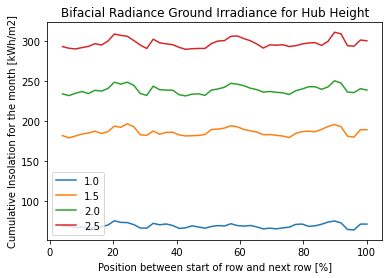

In [102]:
for hh in range (0, len(hub_heights)):
    hub_height = hub_heights[hh]
    from bifacialvf import loadVFresults
    Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\cumulative_results_HubHeight_'+str(hub_height)+'.csv'
    print(Radiance_File)
    (data2, metadata) = loadVFresults(Radiance_File)

    #Based on calculations, the points in the bifacial radiance file that correspond with the points in the bifacialvf
    # file are (0,-1) to (0,5.06). This is rows 13272 through 13256 (16 points) in the excel file. Will isolate these rows
    #data2.rename(columns={ data2.columns[0]: "x", data2.columns[1]: "y",data2.columns[2]: "z", data2.columns[3]: "mattype",
                       #data2.columns[4]: "Wm2Front",}, inplace = True)
    #print(data2)
    data_line = data2#.iloc[13253:13269] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
    #data_line_f=np.flipud(data_line)
    data_line_f = data_line[::-1].reset_index(drop = True) 
    data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "rearZ",data_line_f.columns[4]: "matttype",data_line_f.columns[5]: "rearMat,",data_line_f.columns[6]: "Wm2Front",data_line_f.columns[7]: "Wm2Back",data_line_f.columns[8]: "Back/FrontRatio"}, inplace = True)
    #we're focused on later points.
    #print(data_line_f)
    #print(data_line_f['Wm2Front'].min())

    xstep = (len(data_line_f))
    x_axis = list(range(1,101))
    x_axis_rad = np.linspace(0,100,xstep)
    #print(x_axis_rad)
    #print(x_axis)
   
    yshift = data_line_f['y'] # Shift x_axis so it starts at 0 and not -1
    ystep = (yshift/pitch_def)*100
    module_end = (2/pitch_def)*100 #Percentage between rows where the module ends)
    plt.figure(1)
    #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label=clearance_height)
    Radiance = plt.plot(ystep,data_line_f['Wm2Front']/1000, label=hub_height)
    plt.title('Bifacial Radiance Ground Irradiance for Hub Height')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
    #plt.axvspan(0, module_end, alpha=.05, color='green')
    plt.legend()
    #Q In bifacial Radiacne is (0,0) the middle of the module or the bottom edge

## VF and Radiance Clearance Height Percent Differences

for ch in range (0, len(clearance_heights)):
    clearance_height = clearance_heights[ch]
    Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_ClearanceHeight_'+str(clearance_height)+'_Ground_Analysis_Front.csv'
    (data2, metadata) = loadVFresults(Radiance_File)
    data_line = data2 
    data_line_f = data_line[::-1].reset_index(drop = True) 
    data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "mattype",data_line_f.columns[4]: "Wm2Front",}, inplace = True)
    #Isolate rows with Wm2Front values over 200,000
    top = data_line_f.loc[data_line_f['Wm2Front'] >220000]
    #Average rows for average of max
    maxave = np.mean(top['Wm2Front'])
    #Find Minimum of plot
    minpoint=np.min(data_line_f['Wm2Front'])
    #Find midpoint of pot
    Mid = (maxave-minpoint)/2
    #Isolate all rows that are below the mid point. There should be two x values corresponding to mid point
    line = data_line_f.loc[data_line_f['Wm2Front'] < Mid]
    #Average these for the average for Radiance
    Radave = np.mean(line['Wm2Front'])
    #print('Average Radiance is',Radave)

    #Do the Same for Bifacial VF
    (data, metadata) = loadVFresults(r'C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_ClearanceHeight_'+str(clearance_height)+'.csv')
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    # I'm sure there's a fancier way to do this but hey, this works.
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    topvf = df.loc[df['Jun'] >220000]
    #Average rows for average of max
    maxavevf = np.mean(topvf['Jun'])
    #Find Minimum of plot
    minpointvf=np.min(df['Jun'])
    #Find midpoint of pot
    Midvf = (maxavevf-minpointvf)/2
    #Isolate all rows that are below the mid point. There should be two x values corresponding to mid point
    linevf = df.loc[df['Jun'] < Midvf]
    #Average these for the average for Radiance
    VFave = np.mean(linevf['Jun'])
    #print('Average VF is',VFave)

    Pdif = abs((Radave-VFave)/((Radave+VFave)/2)*100)
    print('For Clearance Height =',clearance_height,'difference is',Pdif,'%')

## Back of Module Clearance Height Comparison

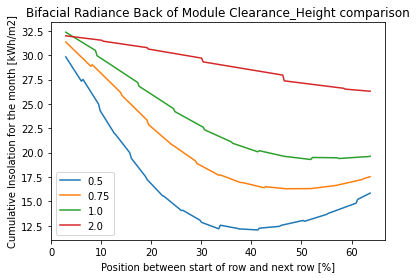

In [79]:
for ch in range (0, len(clearance_heights)):
    clearance_height = clearance_heights[ch]
    from bifacialvf import loadVFresults
    Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_ClearanceHeight_'+str(clearance_height)+'_Ground_Analysis_Back.csv'
    (data2, metadata) = loadVFresults(Radiance_File)

    #Based on calculations, the points in the bifacial radiance file that correspond with the points in the bifacialvf
    # file are (0,-1) to (0,5.06). This is rows 13272 through 13256 (16 points) in the excel file. Will isolate these rows
    #data2.rename(columns={ data2.columns[0]: "x", data2.columns[1]: "y",data2.columns[2]: "z", data2.columns[3]: "mattype",
                       #data2.columns[4]: "Wm2Front",}, inplace = True)
    #print(data2)
    data_line = data2#.iloc[13253:13269] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
    #data_line_f=np.flipud(data_line)
    data_line_f = data_line[::-1].reset_index(drop = True) 
    data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "mattype",data_line_f.columns[4]: "Wm2Back",}, inplace = True)
    #we're focused on later points.
    #print(data_line_f['Wm2Front'].min())

    xstep = (len(data_line_f))
    x_axis = list(range(1,101))
    x_axis_rad = np.linspace(0,100,xstep)
    #print(x_axis_rad)
    #print(x_axis) 
    yshift = data_line_f['y'] + 1 # Shift x_axis so it starts at 0 and not -1
    ystep = (yshift/pitch_def)*100
    #Rad = plt.plot(ystep, data_line_fR['Wm2Front']/1000, label='Rad (122)')
    plt.figure(1)
    #Radiance = plt.plot(x_shift,data_line_f['Wm2Front']/1000, label=tilt)
    Radiance = plt.plot(ystep,data_line_f['Wm2Back']/1000, label=clearance_height)
    plt.title('Bifacial Radiance Back of Module Clearance_Height comparison')
    #plt.xlabel('Distance from lower edge of 1st row (m)')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.legend()
    #Q In bifacial Radiacne is (0,0) the middle of the module or the bottom edge

## Part 3 Varying GCR

In [34]:
module = demo.makeModule(name=moduletype, x=x, y=y, xgap=xgap, ygap=ygap)
for gc in range (0, len(GCRs)):
    #Build scene and run raytracing for all 3 azimuths
    GCR = GCRs[gc]
    trackerdict = demo.set1axis(metdata = metdata, limit_angle = limit_angle, angledelta = angledelta, backtrack = backtrack, 
                            gcr = GCR, cumulativesky = cumulativesky)
    trackerdict = demo.genCumSky1axis()
    pitch = CW/GCR
    #ystart = length/1.328
    #yinc = length/9
    #yinc = -length/(sensorsy_gb[0]-1)  
    writefiletitle = os.path.join(testfolder, 'Results_Test_GCR_'+str(GCR)+'.csv')
    sim_name = sim_general_name+'_GCR_'+str(GCR)
    #Build scene and run raytracing 
    customname = 'GCR_'+ str(GCR)
    yinc = pitch/(sensorsy_gb[0]-1)
    writefiletitle = os.path.join(testfolder, 'Results_Test_GCR_'+str(GCR)+'.csv')
    sim_name = sim_general_name+'_GCR_'+str(GCR)
    modscanfront = {'zstart': 0.05, 'zinc': 0,'orient': '0 0 -1', 'xinc':0,'yinc':yinc}
    sceneDict = {'tilt':0,'pitch': pitch_def,'hub_height':hub_height_def, 'nMods': 20, 'nRows': 7}  
    #sceneDict = {'tilt':tilt_def,'pitch':pitch_def,'clearance_height':clearance_height,'azimuth':azimuth,'nMods': nMods,'nRows': nRows}
    #if hub_height_def == 2: #chaackerdict = trackerdict, module = module, sceneDictnge for hub_heightdef
   
    scene = demo.makeScene1axis(trackerdict = trackerdict, module = module, sceneDict = sceneDict, cumulativesky=cumulativesky) 
    octfile = demo.makeOct1axis(trackerdict = scene) 
    #modWanted = 9
    #rowWanted = 2
        #customname = '_Row_2_Module_09' # This is useful if we want to do various analysis.
    trackerdict = demo.analysis1axis(trackerdict, modscanfront=modscanfront,customname=customname, sensorsx=sensorsx_gb,sensorsy=sensorsy_gb)
        #analysis = bifacial_radiance.AnalysisObj(octfile=octfile, name=sim_name)
        #frontscan, backscan = analysis.moduleAnalysis(scene=scene,sensorsx = sensorsx_gb,sensorsy=sensorsy_gb)
        #groundscan = trackerdict.copgroundscan = frontscan.copy() 
        #groundscan['xstart'] = xstart
        #groundscan['xinc'] = 0
        #groundscan['sx_xinc'] = xinc
        #groundscan['ystart'] = ystart
        #groundscan['yinc'] = yinc
       # groundscan['zstart'] = 0.05
      #  groundscan['zinc'] = 0
     #   groundscan['orient'] = '0 0 -1'
    #scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, radname = sim_name)
    #octfile = demo.makeOct(demo.getfilelist())
    #frontscan, backscan = analysis.moduleAnalysis(scene=scene, sensorsy=sensorsy_gb, sensorsx = sensorsx_gb)
    #analysis.analysis(octfile, name=sim_name+'_Module_Analysis', frontscan=frontscan, backscan=backscan)
    #analysis.analysis(octfile, name=sim_name+'_Ground_Analysis', frontscan=groundscan, backscan=backscan)


Module Name: test-module
Module test-module updated in module.json
Pre-existing .rad file objects\test-module.rad will be overwritten

Saving file EPWs\1axis_-60.0.csv, # points: 30
Saving file EPWs\1axis_-50.0.csv, # points: 52
Saving file EPWs\1axis_-40.0.csv, # points: 38
Saving file EPWs\1axis_-30.0.csv, # points: 30
Saving file EPWs\1axis_-10.0.csv, # points: 60
Saving file EPWs\1axis_0.0.csv, # points: 30
Saving file EPWs\1axis_10.0.csv, # points: 11
Saving file EPWs\1axis_20.0.csv, # points: 19
Saving file EPWs\1axis_30.0.csv, # points: 44
Saving file EPWs\1axis_40.0.csv, # points: 46
Saving file EPWs\1axis_50.0.csv, # points: 26
Saving file EPWs\1axis_60.0.csv, # points: 34
message: There were 30 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-60.0.rad
message: There were 52 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-50.0.rad
message: There were 38 sun up hours in this climate file
Total Ibh/Lbh

Saved: results\irr_1axis_-40.0GCR_0.33.csv
Index: -40.0. Wm2Front: 9918.99452. Wm2Back: 1544.30144
Linescan in process: 1axis_-30.0GCR_0.33_Front
Linescan in process: 1axis_-30.0GCR_0.33_Back
Saved: results\irr_1axis_-30.0GCR_0.33.csv
Index: -30.0. Wm2Front: 25920.0284. Wm2Back: 3171.33284
Linescan in process: 1axis_-10.0GCR_0.33_Front
Linescan in process: 1axis_-10.0GCR_0.33_Back
Saved: results\irr_1axis_-10.0GCR_0.33.csv
Index: -10.0. Wm2Front: 11658.05366. Wm2Back: 3160.6949399999994
Linescan in process: 1axis_0.0GCR_0.33_Front
Linescan in process: 1axis_0.0GCR_0.33_Back
Saved: results\irr_1axis_0.0GCR_0.33.csv
Index: 0.0. Wm2Front: 1916.56478. Wm2Back: 3251.7387399999993
Linescan in process: 1axis_10.0GCR_0.33_Front
Linescan in process: 1axis_10.0GCR_0.33_Back
Saved: results\irr_1axis_10.0GCR_0.33.csv
Index: 10.0. Wm2Front: 633.804478. Wm2Back: 1168.633006
Linescan in process: 1axis_20.0GCR_0.33_Front
Linescan in process: 1axis_20.0GCR_0.33_Back
Saved: results\irr_1axis_20.0GCR_0.3

Saving file EPWs\1axis_40.0.csv, # points: 60
message: There were 30 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-50.0.rad
message: There were 30 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-40.0.rad
message: There were 30 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-30.0.rad
message: There were 30 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-20.0.rad
message: There were 60 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-10.0.rad
message: There were 58 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-0.0.rad
message: There were 40 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_10.0.rad
message: There were 49 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_20.0.rad
messa

## Ground Irradiance GCR Comparison

In [38]:
for gc in range (0, len(GCRs)):
    GCR = GCRs[gc]
    from bifacialvf import loadVFresults
    Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\cumulative_results_GCR_'+str(GCR)+'.csv'
    print(Radiance_File)
    (data2, metadata) = loadVFresults(Radiance_File)
    
    pitch = CW/GCR
    module_end = (2/pitch)*100 #Percentage between rows where the module ends)
    #print(yinc)
    #print(pitch)
    yinc = -pitch/(sensorsy_gb[0]-1)
    #s_point= round(13254 + (pitch/yinc)*-1)
    #start_point = round(13270 + (pitch/yinc))
    print(pitch)
    print(yinc)
    print(round(pitch/yinc))
    
    #Based on calculations, the points in the bifacial radiance file that correspond with the points in the bifacialvf
    # file are (0,-1) to (0,5.06). This is rows 13272 through 13256 (16 points) in the excel file. Will isolate these rows
    #data2.rename(columns={ data2.columns[0]: "x", data2.columns[1]: "y",data2.columns[2]: "z", data2.columns[3]: "mattype",                   #data2.columns[4]: "Wm2Front",}, inplace = True)
    #data_line = data2.iloc[13254:s_point] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
    data_line = data2#.iloc[start_point:13270] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
    #print(data_line)
    #data_line_f=np.flipud(data_line)
    data_line_f = data_line[::-1].reset_index(drop = True) #Flip the column
    data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "mattype",data_line_f.columns[4]: "Wm2Front",}, inplace = True)
    #we're focused on later points.
    #print(data_line_f)
    #print(data_line_f['Wm2Front'].min())

    xstep = (len(data_line_f))
    #print(xstep)
    x_axis = list(range(1,101))
    x_axis_rad = np.linspace(0,100,xstep)
    #print(x_axis_rad)
    #print(x_axis)
    
    yshift = data_line_f['y'] + 1 # Shift x_axis so it starts at 0 and not -1
    ystep = (yshift/pitch)*100

    plt.figure(1)
    #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label=GCR)
    Radiance = plt.plot(ystep,data_line_f['Wm2Front']/1000, label=GCR)
    plt.title('Comparison of Bifacial Radiance Ground Irradiance Values for GCR')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for June [kWh/m2]')
    plt.axvspan(0, module_end, alpha=.1, color='green')
    plt.legend()
    #Q In bifacial Radiacne is (0,0) the middle of the module or the bottom edge

C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\cumulative_results_GCR_0.28.csv
3.571428571428571
-0.07288629737609328
-49


TypeError: unsupported operand type(s) for /: 'str' and 'int'

<Figure size 432x288 with 0 Axes>

## VF and Radiance GCR Percent Difference

In [13]:
for gc in range (0, len(GCRs)):
    GCR = GCRs[gc]
    Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_GCR_'+str(GCR)+'_Ground_Analysis_Front.csv'
    (data2, metadata) = loadVFresults(Radiance_File)
    data_line = data2 
    data_line_f = data_line[::-1].reset_index(drop = True) 
    data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "mattype",data_line_f.columns[4]: "Wm2Front",}, inplace = True)
    #Isolate rows with Wm2Front values over 200,000
    top = data_line_f.loc[data_line_f['Wm2Front'] >220000]
    #Average rows for average of max
    maxave = np.mean(top['Wm2Front'])
    #Find Minimum of plot
    minpoint=np.min(data_line_f['Wm2Front'])
    #Find midpoint of pot
    Mid = (maxave-minpoint)/2
    #Isolate all rows that are below the mid point. There should be two x values corresponding to mid point
    line = data_line_f.loc[data_line_f['Wm2Front'] < Mid]
    #Average these for the average for Radiance
    Radave = np.mean(line['Wm2Front'])
    #print('Average Radiance is',Radave)

    #Do the Same for Bifacial VF
    (data, metadata) = loadVFresults(r'C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_GCR_'+str(GCR)+'.csv')
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    # I'm sure there's a fancier way to do this but hey, this works.
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    topvf = df.loc[df['Jun'] >220000]
    #Average rows for average of max
    maxavevf = np.mean(topvf['Jun'])
    #Find Minimum of plot
    minpointvf=np.min(df['Jun'])
    #Find midpoint of pot
    Midvf = (maxavevf-minpointvf)/2
    #Isolate all rows that are below the mid point. There should be two x values corresponding to mid point
    linevf = df.loc[df['Jun'] < Midvf]
    #Average these for the average for Radiance
    VFave = np.mean(linevf['Jun'])
    #print('Average VF is',VFave)

    Pdif = (Radave-VFave)/((Radave+VFave)/2)*100
    print('For GCR =',GCR,'difference is',Pdif,'%')

For GCR = 0.28 difference is 16.90712669901692 %
For GCR = 0.33 difference is 20.41808628697073 %
For GCR = 0.4 difference is 32.07508049147131 %
For GCR = 0.6 difference is 12.513205483330328 %


## Back of Module GCR Comparison

C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_GCR_0.28_Ground_Analysis_Back.csv
78.87938524157181
10.714285714285714
-0.6518957457981142
-16
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_GCR_0.33_Ground_Analysis_Back.csv
67.51574887793544
9.09090909090909
-0.5579813956854168
-16
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_GCR_0.4_Ground_Analysis_Back.csv
56.37938524157182
7.5
-0.4659453325749737
-16
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_GCR_0.6_Ground_Analysis_Back.csv
38.87938524157182
5.0
-0.32131723340142
-16


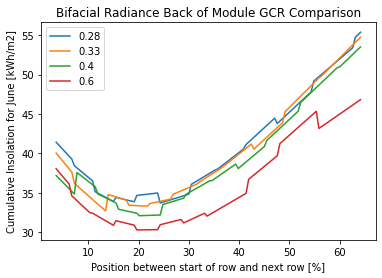

In [195]:
for gc in range (0, len(GCRs)):
    GCR = GCRs[gc]
    from bifacialvf import loadVFresults
    Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_GCR_'+str(GCR)+'_Ground_Analysis_Back.csv'
    print(Radiance_File)
    (data2, metadata) = loadVFresults(Radiance_File)
    
    pitch = CW/GCR
    #print(yinc)
    #print(pitch)
    length = pitch*nRows+(y* np.cos(np.radians(tilt_def)))+2
    print(length)
    yinc = -length/(sensorsy_gb[0]-1)
    #s_point= round(13254 + (pitch/yinc)*-1)
    #start_point = round(13270 + (pitch/yinc))
    print(pitch)
    print(yinc)
    print(round(pitch/yinc))
    
    #Based on calculations, the points in the bifacial radiance file that correspond with the points in the bifacialvf
    # file are (0,-1) to (0,5.06). This is rows 13272 through 13256 (16 points) in the excel file. Will isolate these rows
    #data2.rename(columns={ data2.columns[0]: "x", data2.columns[1]: "y",data2.columns[2]: "z", data2.columns[3]: "mattype",                   #data2.columns[4]: "Wm2Front",}, inplace = True)
    #data_line = data2.iloc[13254:s_point] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
    data_line = data2#.iloc[start_point:13270] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
    #print(data_line)
    #data_line_f=np.flipud(data_line)
    data_line_f = data_line[::-1].reset_index(drop = True) #Flip the column
    data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "mattype",data_line_f.columns[4]: "Wm2Front",}, inplace = True)
    #we're focused on later points.
    #print(data_line_f)
    #print(data_line_f['Wm2Front'].min())

    xstep = (len(data_line_f))
    #print(xstep)
    x_axis = list(range(1,101))
    x_axis_rad = np.linspace(0,100,xstep)
    #print(x_axis_rad)
    #print(x_axis)
    
    yshift = data_line_f['y'] + 1 # Shift x_axis so it starts at 0 and not -1
    ystep = (yshift/CW)*100

    plt.figure(1)
    #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label=GCR)
    Radiance = plt.plot(ystep,data_line_f['Wm2Front']/1000, label=GCR)
    plt.title('Bifacial Radiance Back of Module GCR Comparison')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for June [kWh/m2]')
    plt.legend()
    #Q In bifacial Radiacne is (0,0) the middle of the module or the bottom edge

## Part 4 Varying Y Gaps

In [154]:
xl = 2
yl = 1 
ygaps = [0,.1,.2,.3,.5,1]
numpanels_l = 2
for yg in range (0, len(ygaps)):
     #Build scene and run raytracing for all 3 azimuths
    ygap = ygaps[yg]
    module = demo.makeModule(name=moduletype, x=xl, y=yl,numpanels = numpanels_l, xgap=xgap, ygap=ygap)
    CW = yl * numpanels_l +(ygap * (numpanels_l-1)) #Collector Width
    pitch = CW/GCR_def
    print(CW,pitch)
    length = pitch*nRows+(y* np.cos(np.radians(tilt_def)))+2
    #ystart = length/1.328
    #yinc = length/9
    #yinc = -length/(sensorsy_gb[0]-1) 
    yinc = pitch/(sensorsy_gb[0]-1) 
    print(length,ystart,yinc)
    writefiletitle = os.path.join(testfolder, 'Results_Test_Ygap_'+str(ygap)+'.csv')
    sim_name = sim_general_name+'_Ygap_'+str(ygap)
    sceneDict = {'tilt':tilt_def,'pitch':pitch,'clearance_height':clearance_height_def,'azimuth':azimuth,'nMods': nMods,'nRows': nRows}
    if tilt_def == 20:
        scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, radname = sim_name)
        octfile = demo.makeOct(demo.getfilelist())  
        analysis = bifacial_radiance.AnalysisObj(octfile=octfile, name=sim_name)
        frontscan, backscan = analysis.moduleAnalysis(scene=scene,sensorsx = sensorsx_gb,sensorsy=sensorsy_gb)
        groundscan = frontscan.copy() 
        #groundscan['xstart'] = xstart
        #groundscan['xinc'] = 0
        #groundscan['sx_xinc'] = xinc
        #groundscan['ystart'] = ystart
        groundscan['yinc'] = yinc
        groundscan['zstart'] = 0.05
        groundscan['zinc'] = 0
        groundscan['orient'] = '0 0 -1'
    scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, radname = sim_name)
    octfile = demo.makeOct(demo.getfilelist())
    frontscan, backscan = analysis.moduleAnalysis(scene=scene, sensorsy=sensorsy_gb, sensorsx = sensorsx_gb) #Change x and y sensors to match if you want to autogenerate front/back ratio
    analysis.analysis(octfile, name=sim_name+'_Module_Analysis', frontscan=frontscan, backscan=backscan)
    analysis.analysis(octfile, name=sim_name+'_Ground_Analysis', frontscan=groundscan, backscan=backscan)


Module Name: test-module
Module test-module updated in module.json
Pre-existing .rad file objects\test-module.rad will be overwritten

2 6.0606060606060606
46.30362766581424 20.491504950982794 0.050087653393438514
Created Rad_Experiment1.oct
Created Rad_Experiment1.oct
Linescan in process: Rad_Experiment1_Ygap_0_Module_Analysis_Front
Linescan in process: Rad_Experiment1_Ygap_0_Module_Analysis_Back
Saved: results\irr_Rad_Experiment1_Ygap_0_Module_Analysis_Front.csv
Saved: results\irr_Rad_Experiment1_Ygap_0_Module_Analysis_Back.csv
Linescan in process: Rad_Experiment1_Ygap_0_Ground_Analysis_Front
Linescan in process: Rad_Experiment1_Ygap_0_Ground_Analysis_Back
Saved: results\irr_Rad_Experiment1_Ygap_0_Ground_Analysis_Front.csv
Saved: results\irr_Rad_Experiment1_Ygap_0_Ground_Analysis_Back.csv

Module Name: test-module
Module test-module updated in module.json
Pre-existing .rad file objects\test-module.rad will be overwritten

2.1 6.363636363636363
48.424839787026364 20.491504950982794 0

## Compare ground Irradiances

C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_Ygap_0_Ground_Analysis_Front.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_Ygap_0.1_Ground_Analysis_Front.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_Ygap_0.2_Ground_Analysis_Front.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_Ygap_0.3_Ground_Analysis_Front.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_Ygap_0.5_Ground_Analysis_Front.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_Ygap_1_Ground_Analysis_Front.csv


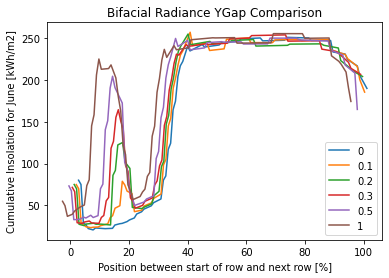

In [149]:
for yg in range (0, len(ygaps)):
    ygap = ygaps[yg]
    from bifacialvf import loadVFresults
    Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_Ygap_'+str(ygap)+'_Ground_Analysis_Front.csv'
    print(Radiance_File)
    (data2, metadata) = loadVFresults(Radiance_File)
    
    CW = yl * numpanels_l +(ygap * (numpanels_l-1)) #Collector Width
    pitch = CW/GCR_def
    
    #pitch = CW/GCR
    #print(yinc)
    #print(pitch)
    #length = pitch*nRows+(y* np.cos(np.radians(tilt_def)))+2
    #print(length)
    #yinc = -length/(sensorsy_gb[0]-1)
    #s_point= round(13254 + (pitch/yinc)*-1)
    #start_point = round(13270 + (pitch/yinc))
    #print(pitch)
    #print(yinc)
    #print(round(pitch/yinc))
    
    #Based on calculations, the points in the bifacial radiance file that correspond with the points in the bifacialvf
    # file are (0,-1) to (0,5.06). This is rows 13272 through 13256 (16 points) in the excel file. Will isolate these rows
    #data2.rename(columns={ data2.columns[0]: "x", data2.columns[1]: "y",data2.columns[2]: "z", data2.columns[3]: "mattype",                   #data2.columns[4]: "Wm2Front",}, inplace = True)
    #data_line = data2.iloc[13254:s_point] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
    data_line = data2#.iloc[start_point:13270] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
    #print(data_line)
    #data_line_f=np.flipud(data_line)
    data_line_f = data_line[::-1].reset_index(drop = True) #Flip the column
    data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "mattype",data_line_f.columns[4]: "Wm2Front",}, inplace = True)
    #we're focused on later points.
    #print(data_line_f)
    #print(data_line_f['Wm2Front'].min())

    xstep = (len(data_line_f))
    #print(xstep)
    x_axis = list(range(1,101))
    x_axis_rad = np.linspace(0,100,xstep)
    #print(x_axis_rad)
    #print(x_axis)
    
    yshift = data_line_f['y'] + 1 # Shift x_axis so it starts at 0 and not -1
    ystep = (yshift/pitch)*100

    plt.figure(1)
    #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label=GCR)
    Radiance = plt.plot(ystep,data_line_f['Wm2Front']/1000, label=ygap)
    plt.title('Bifacial Radiance YGap Comparison')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for June [kWh/m2]')
    plt.legend()
    #Q In bifacial Radiacne is (0,0) the middle of the module or the bottom edge

## Average YGap comparison

In [41]:
xl = 2
yl = 1 
ygaps = [0,.1,.2,.3,.5,1]
numpanels_l = 2
for yg in range (0, len(ygaps)):
    ygap = ygaps[yg]
    from bifacialvf import loadVFresults
    Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_Ygap_'+str(ygap)+'_Ground_Analysis_Front.csv'
    (data2, metadata) = loadVFresults(Radiance_File)
    data_line = data2 
    data_line_f = data_line[::-1].reset_index(drop = True) 
    data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "mattype",data_line_f.columns[4]: "Wm2Front",}, inplace = True)
    #Isolate rows with Wm2Front values over 200,000
    top = data_line_f.loc[data_line_f['Wm2Front'] >230000]
    #Average rows for average of max
    maxave = np.mean(top['Wm2Front'])
    #Find Minimum of plot
    minpoint=np.min(data_line_f['Wm2Front'])
    #Find midpoint of pot
    Mid = (maxave-minpoint)/2
    #print('Mid is', Mid)
    #Isolate all rows that are below the mid point. There should be two x values corresponding to mid point
    line = data_line_f.loc[data_line_f['Wm2Front'] < Mid]
    #print(line)
    #Find last point
    last = line.iloc[0]
    #print(last)
    #return row number of the last point
    lp = line[line['y'] == last['y']].index[0]
    #print(lp)
    #Make matrx of al points before last point
    #Make matrix of all points from 0 to last point
    merge = data_line_f.iloc[lp:]
    #print(merge)
    #Average these for the average for Radiance
    Radave = np.mean(merge['Wm2Front'])
    print('Average Radiance for', ygap,'is',Radave)

    #Do the Same for Bifacial VF
    CW = yl * numpanels_l +(ygap * (numpanels_l-1)) #Collector Width
    AA = yl*numpanels_l #Area of module that light hits
    transFactor = 1 - (AA/CW) # TransmissionFactor(open area fraction)
    (data, metadata) = loadVFresults(r'C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_TFactor_'+str(transFactor)+'.csv')
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    # I'm sure there's a fancier way to do this but hey, this works.
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    topvf = df.loc[df['Jun'] >240000]
    #Average rows for average of max
    maxavevf = np.mean(topvf['Jun'])
    #print('Max VF is',maxavevf)
    #Find Minimum of plot
    minpointvf=np.min(df['Jun'])
    #print('Min VF is',minpointvf)
    #Find midpoint of pot
    Midvf = (maxavevf-minpointvf)/2
    #print('Midpoint is',Midvf)
    #Isolate all rows that are below the mid point. There should be two x values corresponding to mid point
    linevf = df.loc[df['Jun'] < Midvf]
    #print(linevf)
    #Average these for the average for Radiance
    #VFave = np.mean(linevf['Jun'])
    #print('Average VF is',VFave)

    Pdif = abs((Radave-VFave)/((Radave+VFave)/2)*100)
    #print('For Ygap =',ygap,'difference is',Pdif,'%')

Average Radiance for 0 is 38480.641351351354
Average Radiance for 0.1 is 45672.34972972974
Average Radiance for 0.2 is 59122.12973684212
Average Radiance for 0.3 is 66619.04
Average Radiance for 0.5 is 82399.22236842106
Average Radiance for 1 is 110518.51486486486


## Compare Back of Module

C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_Ygap_0_Ground_Analysis_Back.csv
0      1.849005
1      1.833473
2      1.817941
3      1.802409
4      1.786877
         ...   
113    0.093877
114    0.078345
115    0.062812
116    0.047280
117    0.031748
Name: y, Length: 118, dtype: float64
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_Ygap_0.1_Ground_Analysis_Back.csv
0      1.941421
1      1.925112
2      1.908804
3      1.892495
4      1.876186
         ...   
113    0.098536
114    0.082228
115    0.065919
116    0.049610
117    0.033301
Name: y, Length: 118, dtype: float64
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_Ygap_0.2_Ground_Analysis_Back.csv
0      2.033838
1      2.016752
2      1.999667
3      1.982582
4      1.965496
         ...   
113    0.103196
114    0.086111
1

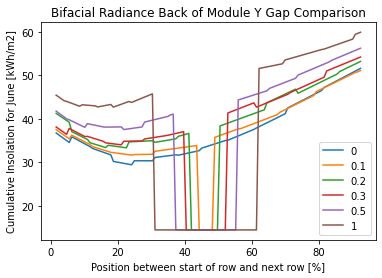

In [185]:
for yg in range (0, len(ygaps)):
    ygap = ygaps[yg]
    from bifacialvf import loadVFresults
    #Change to File Name
    Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_Ygap_'+str(ygap)+'_Ground_Analysis_Back.csv'
    print(Radiance_File)
    (data2, metadata) = loadVFresults(Radiance_File)
    
    CW = yl * numpanels_l +(ygap * (numpanels_l-1)) #Collector Width
    pitch = CW/GCR_def
    
    #pitch = CW/GCR
    #print(yinc)
    #print(pitch)
    #length = pitch*nRows+(y* np.cos(np.radians(tilt_def)))+2
    #print(length)
    #yinc = -length/(sensorsy_gb[0]-1)
    #s_point= round(13254 + (pitch/yinc)*-1)
    #start_point = round(13270 + (pitch/yinc))
    #print(pitch)
    #print(yinc)
    #print(round(pitch/yinc))
    
    #Based on calculations, the points in the bifacial radiance file that correspond with the points in the bifacialvf
    # file are (0,-1) to (0,5.06). This is rows 13272 through 13256 (16 points) in the excel file. Will isolate these rows
    #data2.rename(columns={ data2.columns[0]: "x", data2.columns[1]: "y",data2.columns[2]: "z", data2.columns[3]: "mattype",                   #data2.columns[4]: "Wm2Front",}, inplace = True)
    #data_line = data2.iloc[13254:s_point] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
    data_line = data2#.iloc[start_point:13270] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
    #print(data_line)
    #data_line_f=np.flipud(data_line)
    data_line_f = data_line[::-1].reset_index(drop = True) #Flip the column
    data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "mattype",data_line_f.columns[4]: "Wm2Back",}, inplace = True)
    #we're focused on later points.
    #print(data_line_f)
    #print(data_line_f['Wm2Front'].min())

    xstep = (len(data_line_f))
    #print(xstep)
    x_axis = list(range(1,101))
    x_axis_rad = np.linspace(0,100,xstep)
    #print(x_axis_rad)
    #print(x_axis)
    
    yshift = data_line_f['y'] + abs(float(data_line_f['y'].iloc[[0]]))# Shift x_axis so it starts at 0 and not -1
    print(yshift)
    ystep = (yshift/CW)*100

    plt.figure(1)
    #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label=GCR)
    Radiance = plt.plot(ystep,data_line_f['Wm2Back']/1000, label=ygap)
    plt.title('Bifacial Radiance Back of Module Y Gap Comparison')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for June [kWh/m2]')
    plt.legend()
    #Q In bifacial Radiacne is (0,0) the middle of the module or the bottom edge

## Hourly Tracking

In [45]:
demo = bifacial_radiance.RadianceObj(sim_general_name,str(testfolder)) 
demo.setGround(albedo)
epwfile = demo.getEPW(lat,lon)  
starttime = '06_01';  endtime = '06_01' 
metdata = demo.readWeatherFile(epwfile, starttime=starttime, endtime=endtime, coerce_year = 2021) # Name and path
#metdata=demo.readWeatherFile(epwfile, starttime=starttime, endtime=endtime)
limit_angle = 60 # tracker rotation limit angle. Setting it ridiculously small so this runs faster.
angledelta = 10 # sampling between the limit angles. 
backtrack = True
gcr = GCR_def
cumulativesky = True # This is important 
trackerdict = demo.set1axis(metdata = metdata, limit_angle = limit_angle, angledelta = angledelta, backtrack = backtrack, 
                            gcr = gcr, cumulativesky = False)
trackerdict = demo.gendaylit1axis() 
trackerkeys = sorted(trackerdict.keys())

path = C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2
Loading albedo, 1 value(s), 0.310 avg
1 nonzero albedo values.
Getting weather file: USA_AZ_Davis-Monthan.AFB.722745_TMY3.epw
 ... OK!
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
Creating ~14 skyfiles. 
Created 14 skyfiles in /skies/


In [46]:
print(trackerkeys)

['2021-06-01_0600', '2021-06-01_0700', '2021-06-01_0800', '2021-06-01_0900', '2021-06-01_1000', '2021-06-01_1100', '2021-06-01_1200', '2021-06-01_1300', '2021-06-01_1400', '2021-06-01_1500', '2021-06-01_1600', '2021-06-01_1700', '2021-06-01_1800', '2021-06-01_1900']


In [57]:
module = demo.makeModule(name=moduletype, x=x, y=y, xgap=xgap, ygap=ygap)
times = ['2021-06-01_0600', '2021-06-01_0700', '2021-06-01_0800', '2021-06-01_0900', '2021-06-01_1000', '2021-06-01_1100', '2021-06-01_1200', '2021-06-01_1300', '2021-06-01_1400', '2021-06-01_1500', '2021-06-01_1600', '2021-06-01_1700', '2021-06-01_1800', '2021-06-01_1900']
#times = ['2021-06-01_1000','2021-06-01_1100', '2021-06-01_1200', '2021-06-01_1300', '2021-06-01_1400', '2021-06-01_1500']
for hh in range (0, len(hub_heights)):
    #Build scene and run raytracing for all 3 azimuths
    hub_height = hub_heights[hh]
    yinc = pitch_def/(sensorsy_gb[0]-1)
    modscanfront = {'zstart': 0.05, 'zinc': 0,'orient': '0 0 -1', 'xinc':0,'yinc':yinc}
    sceneDict = {'tilt':0,'pitch': pitch_def,'hub_height':hub_height, 'nMods': 20, 'nRows': 7}  
    #sceneDict = {'tilt':tilt_def,'pitch':pitch_def,'clearance_height':clearance_height,'azimuth':azimuth,'nMods': nMods,'nRows': nRows}
    #if hub_height_def == 2: #chaackerdict = trackerdict, module = module, sceneDictnge for hub_heightdef
    for time in times:
        writefiletitle = os.path.join(testfolder, 'Results_Test_HubHeight_hourly_'+str(hub_height)+time+'.csv')
        sim_name = sim_general_name+'_HubHeight_'+str(hub_height)
        octfile = demo.makeOct1axis(trackerdict = scene, singleindex=time)
        demo.makeOct1axis(singleindex=time)
        scene = demo.makeScene1axis(trackerdict = trackerdict, module = module, sceneDict = sceneDict, cumulativesky=False) 
         
        #modWanted = 9
        #rowWanted = 2
            #customname = '_Row_2_Module_09' # This is useful if we want to do various analysis.
        trackerdict = demo.analysis1axis(trackerdict, modscanfront=modscanfront,customname=sim_name, sensorsx=sensorsx_gb,sensorsy=sensorsy_gb, singleindex=time)
            #analysis = bifacial_radiance.AnalysisObj(octfile=octfile, name=sim_name)
            #frontscan, backscan = analysis.moduleAnalysis(scene=scene,sensorsx = sensorsx_gb,sensorsy=sensorsy_gb)
            #groundscan = trackerdict.copy() 


Module Name: test-module
Module test-module updated in module.json
Pre-existing .rad file objects\test-module.rad will be overwritten


Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0600.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0600.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/
Linescan in process: 1axis_2021-06-01_0600Rad_Experiment2_HubHeight_1.0_Front
Linescan in process: 1axis_2021-06-01_0600Rad_Experiment2_HubHeight_1.0_Back
Saved: results\irr_1axis_2021-06-01_0600Rad_Experiment2_HubHeight_1.0.csv
Index: 2021-06-01_0600. Wm2Front: 8.423202439999999. Wm2Back: 2.488872232

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0700.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0700.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/
Linescan in process: 1axis_2021-06-01_0700Rad_Experim

Linescan in process: 1axis_2021-06-01_0600Rad_Experiment2_HubHeight_1.5_Back
Saved: results\irr_1axis_2021-06-01_0600Rad_Experiment2_HubHeight_1.5.csv
Index: 2021-06-01_0600. Wm2Front: 8.09454304. Wm2Back: 0.6135329

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0700.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0700.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/
Linescan in process: 1axis_2021-06-01_0700Rad_Experiment2_HubHeight_1.5_Front
Linescan in process: 1axis_2021-06-01_0700Rad_Experiment2_HubHeight_1.5_Back
Saved: results\irr_1axis_2021-06-01_0700Rad_Experiment2_HubHeight_1.5.csv
Index: 2021-06-01_0700. Wm2Front: 15.775324000000001. Wm2Back: 7.68808918

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0800.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0800.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Rad

Linescan in process: 1axis_2021-06-01_0700Rad_Experiment2_HubHeight_2.0_Back
Saved: results\irr_1axis_2021-06-01_0700Rad_Experiment2_HubHeight_2.0.csv
Index: 2021-06-01_0700. Wm2Front: 17.1367412. Wm2Back: 8.66107766

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0800.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0800.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/
Linescan in process: 1axis_2021-06-01_0800Rad_Experiment2_HubHeight_2.0_Front
Linescan in process: 1axis_2021-06-01_0800Rad_Experiment2_HubHeight_2.0_Back
Saved: results\irr_1axis_2021-06-01_0800Rad_Experiment2_HubHeight_2.0.csv
Index: 2021-06-01_0800. Wm2Front: 28.8480192. Wm2Back: 18.949162

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0900.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0900.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles cr

Linescan in process: 1axis_2021-06-01_0800Rad_Experiment2_HubHeight_2.5_Back
Saved: results\irr_1axis_2021-06-01_0800Rad_Experiment2_HubHeight_2.5.csv
Index: 2021-06-01_0800. Wm2Front: 29.315281400000003. Wm2Back: 20.3431426

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0900.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0900.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/
Linescan in process: 1axis_2021-06-01_0900Rad_Experiment2_HubHeight_2.5_Front
Linescan in process: 1axis_2021-06-01_0900Rad_Experiment2_HubHeight_2.5_Back
Saved: results\irr_1axis_2021-06-01_0900Rad_Experiment2_HubHeight_2.5.csv
Index: 2021-06-01_0900. Wm2Front: 67.652597. Wm2Back: 29.692490399999993

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_1000.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_1000.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..

C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\results\irr_1axis_2021-06-01_0900Rad_Experiment2_HubHeight_1.0.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\results\irr_1axis_2021-06-01_0900Rad_Experiment2_HubHeight_1.5.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\results\irr_1axis_2021-06-01_0900Rad_Experiment2_HubHeight_2.0.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\results\irr_1axis_2021-06-01_0900Rad_Experiment2_HubHeight_2.5.csv


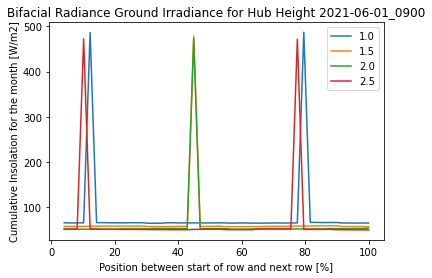

In [76]:
dates=['2021-06-01_0900'] #2021-06-01_1100', '2021-06-01_1200', '2021-06-01_1300', '2021-06-01_1400', '2021-06-01_1500'
for date in dates:
    for hh in range (0, len(hub_heights)):
        hub_height = hub_heights[hh]
        from bifacialvf import loadVFresults
        Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\results\irr_1axis_'+date+'Rad_Experiment2_HubHeight_'+str(hub_height)+'.csv'
        print(Radiance_File)
        (data2, metadata) = loadVFresults(Radiance_File)

        #Based on calculations, the points in the bifacial radiance file that correspond with the points in the bifacialvf
        # file are (0,-1) to (0,5.06). This is rows 13272 through 13256 (16 points) in the excel file. Will isolate these rows
        #data2.rename(columns={ data2.columns[0]: "x", data2.columns[1]: "y",data2.columns[2]: "z", data2.columns[3]: "mattype",
                           #data2.columns[4]: "Wm2Front",}, inplace = True)
        #print(data2)
        data_line = data2#.iloc[13253:13269] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
        #data_line_f=np.flipud(data_line)
        data_line_f = data_line[::-1].reset_index(drop = True) 
        data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "rearZ",data_line_f.columns[4]: "matttype",data_line_f.columns[5]: "rearMat,",data_line_f.columns[6]: "Wm2Front",data_line_f.columns[7]: "Wm2Back",data_line_f.columns[8]: "Back/FrontRatio"}, inplace = True)
        #we're focused on later points.
        #print(data_line_f['Wm2Front'].min())

        #xstep = (len(data_line_f))
        #x_axis = list(range(1,101))
        #x_axis_rad = np.linspace(0,100,xstep)
        #print(x_axis_rad)
        #print(x_axis)

        yshift = data_line_f['y'] # Shift x_axis so it starts at 0 and not -1
        ystep = (yshift/pitch_def)*100
        module_end = (2/pitch_def)*100 #Percentage between rows where the module ends)
        plt.figure(1)
        #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label=clearance_height)
        Radiance = plt.plot(ystep,data_line_f['Wm2Front'], label=hub_height)
        plt.title('Bifacial Radiance Ground Irradiance for Hub Height '+date)
        plt.xlabel('Position between start of row and next row [%]')
        plt.ylabel('Cumulative Insolation for the month [W/m2]')
        #plt.axvspan(0, module_end, alpha=.05, color='green')
        plt.legend()
        #Q In bifacial Radiacne is (0,0) the middle of the module or the bottom edge

In [101]:
ssh eagle.hpc.nrel.gov

NameError: name 'ssh' is not defined